## Question 1: How do I improve my coding skills from software developers' perspectives?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('./Data/survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
# provide the number of rows and columns in this dataset
num_rows = df.shape[0]
num_cols = df.shape[1]
print(f'number of rows: {num_rows}, number of columns: {num_cols}')

number of rows: 65437, number of columns: 114


In [4]:
# provide a set of columns that have no missing values
no_nulls = set(df.columns[~df.isnull().any()])
no_nulls

{'Age', 'Check', 'Employment', 'MainBranch', 'ResponseId'}

In [5]:
# provide a set of columns that have more than 75% if their missing values
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])
most_missing_cols

{'AINextLess integrated',
 'AINextMuch less integrated',
 'AINextMuch more integrated',
 'AINextNo change'}

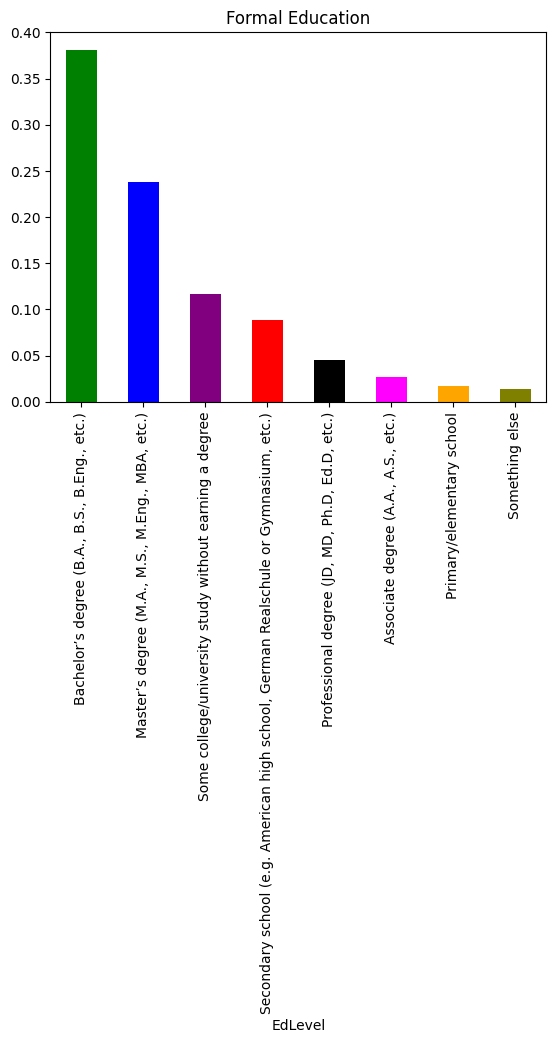

In [6]:
# Look closely at the column: 'EdLevel'
ed_vals = df["EdLevel"].value_counts()
ed_vals

# Create bar chart of the proportion of individuals in each EdLevel category
color = ['green', 'blue', 'purple', 'red', 'black', 'magenta', 'orange', 'olive']
(ed_vals/df.shape[0]).plot(kind="bar", color = color);
plt.title("Formal Education");

In [7]:
how_to_learn_code = df['LearnCode'].value_counts().reset_index()
how_to_learn_code

,LearnCode,count
0,"Other online resources (e.g., videos, blogs, f...",3674
1,Books / Physical media;Other online resources ...,2493
2,"Other online resources (e.g., videos, blogs, f...",2362
3,Books / Physical media;Other online resources ...,2286
4,"Other online resources (e.g., videos, blogs, f...",2182
...,...,...
413,Books / Physical media;On the job training;Sch...,1
414,Books / Physical media;Coding Bootcamp;Friend ...,1
415,"Books / Physical media;Colleague;School (i.e.,...",1
416,"Books / Physical media;Colleague;School (i.e.,...",1


In [8]:
how_to_learn_code.rename(columns={'LearnCode': 'method'}, inplace = True)
how_to_learn_code

,method,count
0,"Other online resources (e.g., videos, blogs, f...",3674
1,Books / Physical media;Other online resources ...,2493
2,"Other online resources (e.g., videos, blogs, f...",2362
3,Books / Physical media;Other online resources ...,2286
4,"Other online resources (e.g., videos, blogs, f...",2182
...,...,...
413,Books / Physical media;On the job training;Sch...,1
414,Books / Physical media;Coding Bootcamp;Friend ...,1
415,"Books / Physical media;Colleague;School (i.e.,...",1
416,"Books / Physical media;Colleague;School (i.e.,...",1


In [9]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col1]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    counts = {key: 0 for key in look_for}
    
    for key in look_for:
        # Filter rows where col1 contains the key
        mask = df[col1].str.contains(key, case=False, na=False, regex=False)
        
        # Sum the values in col2 for the filtered rows
        counts[key] = df[mask][col2].sum()
    
    result_df = pd.DataFrame(list(counts.items()), columns=[col1, 'Total Count'])
    result_df.sort_values('Total Count', ascending = False, inplace = True)
    return result_df



In [10]:
possible_vals = ['Books / Physical media',
                 'Coding Bootcamp',
                 'Colleague',
                 'Friend or family member',
                 'Online Courses or Certification',
                 'On the job training',
                 'Other online resources (e.g., videos, blogs, forum, online community)',
                 'School (i.e., University, College, etc)',
                 'Other (please specify):']
how_to_learn_code_df = total_count(how_to_learn_code, 'method', 'count', possible_vals)
how_to_learn_code_df.set_index('method', inplace = True)
how_to_learn_code_df['Percentage'] = how_to_learn_code_df / how_to_learn_code_df.sum()
how_to_learn_code_df

,Total Count,Percentage
method,,
"Other online resources (e.g., videos, blogs, forum, online community)",49654,0.250706
Books / Physical media,30392,0.153451
Online Courses or Certification,30271,0.152840
"School (i.e., University, College, etc)",29722,0.150068
On the job training,27244,0.137556
Colleague,14258,0.071989
Coding Bootcamp,6503,0.032834
Friend or family member,6378,0.032203
Other (please specify):,3635,0.018353


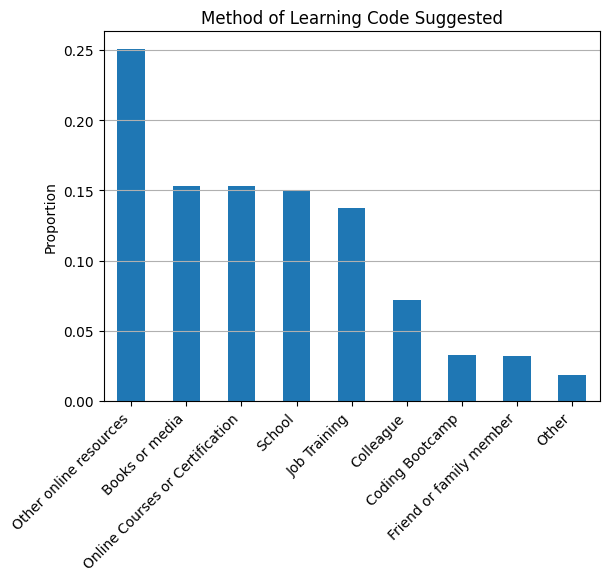

,Total Count
method,
Other online resources,0.250706
Books or media,0.153451
Online Courses or Certification,0.152840
School,0.150068
Job Training,0.137556
Colleague,0.071989
Coding Bootcamp,0.032834
Friend or family member,0.032203
Other,0.018353


In [11]:
possible_vals = ['Books / Physical media',
                 'Coding Bootcamp',
                 'Colleague',
                 'Friend or family member',
                 'Online Courses or Certification',
                 'On the job training',
                 'Other online resources (e.g., videos, blogs, forum, online community)',
                 'School (i.e., University, College, etc)',
                 'Other (please specify):']

possible_vals_reduced = {"Other online resources (e.g., videos, blogs, forum, online community)": "Other online resources",
                      "Books / Physical media": "Books or media",
                      "School (i.e., University, College, etc)": "School",
                      "Online Courses or Certification": "Online Courses or Certification",
                      "On the job training": "Job Training",
                      "Colleague": "Colleague",
                      "Coding Bootcamp": "Coding Bootcamp",
                      "Friend or family member": "Friend or family member",
                      "Other (please specify):": "Other"}

def clean_and_plot(df, title='Method of Learning Code Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the LearnCode column
        title - string the title of your plot
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        how_to_learn_code_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the LearnCode column.
    '''
    how_to_learn_code = df['LearnCode'].value_counts().reset_index()
    how_to_learn_code.rename(columns={'LearnCode': 'method'}, inplace=True)
    how_to_learn_code_df = total_count(how_to_learn_code, 'method', 'count', possible_vals)
    
    how_to_learn_code_df.set_index('method', inplace=True)
    how_to_learn_code_df.rename(index=possible_vals_reduced, inplace = True)
    props_how_to_learn_code_df = how_to_learn_code_df / how_to_learn_code_df.sum()
    if plot:
        props_how_to_learn_code_df.plot(kind='bar', legend=None);
        plt.title(title);
        plt.xlabel('')
        plt.ylabel("Proportion")
        plt.grid(axis = 'y')
        plt.xticks(rotation=45, ha='right')
        plt.show()
    return props_how_to_learn_code_df
    
clean_and_plot(df)

Based on the graph, which shows methods of learning code suggested by software developers, we can draw several insights to answer the question "How do we improve our coding skills from software developers' perspectives?":

1. Utilize online resources: The most popular method, with about 25% of respondents suggesting it, is "Other online resources". This indicates that developers heavily rely on various online platforms, tutorials, documentation, and forums to improve their skills. Leveraging these resources could be a primary strategy for skill improvement.


2. Embrace diverse learning methods: The graph shows a relatively even distribution across several learning methods (books/media, online courses/certification, school, job training), each accounting for about 15% of responses. This suggests that a well-rounded approach combining multiple learning methods may be most effective.


3. Consider formal education and certification: "Online courses or Certification" and "School" are both significant categories, implying that structured learning environments and recognized qualifications are valued by many developers.


4. Learn on the job: "Job training" is also a prominent category, highlighting the importance of practical, hands-on experience in a professional setting. Seeking opportunities for on-the-job learning and mentorship could be crucial.


5. Engage with the developer community: While lower in percentage, "College" (likely referring to coding bootcamps or college courses) and "Friend or family member" are still notable. This suggests that learning from peers and participating in coding communities can be beneficial.


6. Explore intensive programs: "Coding Bootcamp" appears as a distinct category, indicating that some developers find value in these intensive, focused learning experiences.


7. Personalize your approach: The presence of an "Other" category reminds us that there's no one-size-fits-all solution. Developers should be open to finding and combining methods that work best for their individual learning styles and goals.


To improve coding skills, software developers suggest a multi-faceted approach with a strong emphasis on online resources, supplemented by formal education, practical experience, and community engagement. The key seems to be in leveraging a combination of these methods to create a comprehensive and ongoing learning strategy.

## Question 3: How do yearly compensation and job satisfaction affect the suggested methods of learning code?

In [12]:
def higher_ed(level_ed_str):
    '''
    INPUT
        level_ed_str - a string of one of the values from the EdLevel column
    
    OUTPUT
        return 1 if the string is either "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
        or "Professional degree (JD, MD, Ph.D, Ed.D, etc.)"
        return 0 otherwise
    
    '''
    return level_ed_str in  ["Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",
                            "Professional degree (JD, MD, Ph.D, Ed.D, etc.)"]
    

df["EdLevel"].apply(higher_ed)[:5] #Test the function to assure it provides 1 and 0 values for the df

0    False
1    False
2     True
3    False
4    False
Name: EdLevel, dtype: bool

In [13]:
higher_ed_df = df["EdLevel"].apply(higher_ed)
higher_ed_perc = higher_ed_df.mean()
higher_ed_perc

0.283127282729954

In [14]:
at_least_master_degree = df[higher_ed_df == 1]
at_least_master_degree_perc = clean_and_plot(at_least_master_degree, 
                                             title="At least Master's degree", 
                                             plot=False)
print("For those who have master's degree and above:\n")
print(at_least_master_degree_perc)
below_master_degree = df[higher_ed_df == 0]
below_master_degree_perc = clean_and_plot(below_master_degree, 
                                          title="Below Master's degree", 
                                          plot=False)
print("For those who have Bachelor's degree and below:\n")
print(below_master_degree_perc)

For those who have master's degree and above:

                                 Total Count
method                                      
Other online resources              0.234685
Books or media                      0.165375
School                              0.153050
Online Courses or Certification     0.149399
Job Training                        0.145301
Colleague                           0.080025
Coding Bootcamp                     0.028206
Friend or family member             0.027743
Other                               0.016215
For those who have Bachelor's degree and below:

                                 Total Count
method                                      
Other online resources              0.258130
Online Courses or Certification     0.154434
School                              0.148686
Books or media                      0.147925
Job Training                        0.133967
Colleague                           0.068266
Coding Bootcamp                     0.034979
Frie

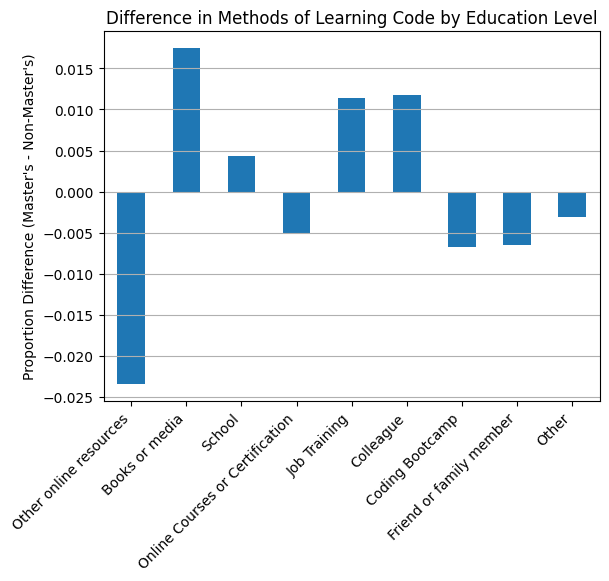

In [15]:
comp_df = pd.merge(at_least_master_degree_perc, 
                   below_master_degree_perc, 
                   left_index=True, 
                   right_index=True)

comp_df.rename(index={"Other online resources (e.g., videos, blogs, forum, online community)": "Other online resources",
                      "Books / Physical media": "Books or media",
                      "School (i.e., University, College, etc)": "School",
                      "Online Courses or Certification": "Online Courses or Certification",
                      "On the job training": "Job Training",
                      "Colleague": "Colleague",
                      "Coding Bootcamp": "Coding Bootcamp",
                      "Friend or family member": "Friend or family member",
                      "Other (please specify):": "Other"}, inplace = True)

comp_df.columns = ['At_Least_Master_Degree','Below_Master_Degree']
comp_df['Diff_HigherEd_Vals'] = comp_df['At_Least_Master_Degree'] - comp_df['Below_Master_Degree']
comp_df['Diff_HigherEd_Vals'].plot(kind='bar')
plt.title('Difference in Methods of Learning Code by Education Level')
plt.xlabel('')
plt.ylabel("Proportion Difference (Master's - Non-Master's)")
plt.grid(axis = 'y')
plt.xticks(rotation=45, ha='right')
plt.show()

There are some interesting insights into how educational background (specifically, having a Master's degree or higher vs. not) influences developers' suggestions for improving coding skills.

1. Books or media:

The largest positive difference indicates that those with advanced degrees are much more likely to recommend learning from books or other media. This could reflect a bias towards traditional academic learning methods.

2. Job training and Colleague:

Both show notable positive differences, suggesting that those with higher degrees place more value on learning through professional experiences and from peers. This might indicate a bias towards workplace-based learning among more highly educated developers.

3. Online courses or Certification:

A small positive difference suggests that those with advanced degrees slightly favor structured online learning, though the difference is not as pronounced as with books or job-related learning.

4. School:

Interestingly, there's a very small positive difference, indicating that both groups value formal education similarly for improving coding skills.

5. Other online resources:

The largest negative difference shows that those without advanced degrees are much more likely to recommend using other online resources. This could indicate a bias among less formally educated developers towards more accessible and potentially free online learning options.

6. Coding Bootcamp, Friend or family member, Other:

These all show small negative differences, suggesting that developers without advanced degrees are slightly more likely to recommend these methods.

Biases revealed:

1. Academic bias: Those with advanced degrees show a strong preference for traditional learning methods (books) and structured learning environments (job training, courses), possibly reflecting their own positive experiences with formal education.

2. Workplace learning bias: The higher emphasis on job training and learning from colleagues among those with advanced degrees might indicate a bias towards learning in professional settings, possibly due to more extensive work experience.

3. Self-directed learning bias: The strong preference for other online resources among those without advanced degrees suggests a bias towards more flexible, self-paced learning methods. This could be due to factors like cost, accessibility, or personal learning preferences.

4. Formal vs. Informal learning bias: There's a clear divide between the two groups in terms of formal (books, courses, job training) and informal (online resources, bootcamps, friends/family) learning methods.

5. Socioeconomic bias: The preferences might reflect underlying socioeconomic factors, with those holding advanced degrees possibly having more access to formal learning opportunities and professional networks.

6. Experience bias: The differences could also reflect biases based on career stage or experience level, with more educated developers possibly being further along in their careers and thus valuing different learning methods.

These biases suggest that recommendations for improving coding skills are influenced by developers' educational backgrounds, potentially leading to varied advice based on personal experiences and access to different learning resources. This highlights the importance of considering diverse perspectives when developing strategies for skill improvement in the tech industry.

## Question 2: How bias played a role in the suggestions of developers for how to improve coding skills?

In [16]:
import pandas as pd
import numpy as np
from scipy import stats

def mean_amt(df, col1, col2, look_for):
    result_data = []

    for key in look_for:
        # Filter rows where col1 contains the key
        mask = df[col1].str.contains(key, case=False, na=False, regex=False)
        
        # Extract relevant data
        filtered_data = df[mask][col2]
        
        # Calculate statistics
        sum_values = filtered_data.sum()
        count_values = filtered_data.count()
        sum_squares = (filtered_data**2).sum()
        mean_value = filtered_data.mean()
        variance_value = filtered_data.var(ddof=1)  # Sample variance
        std_dev_value = filtered_data.std(ddof=1)   # Sample standard deviation
        
        # Calculate 95% confidence intervals
        conf_int = stats.t.interval(0.95, count_values - 1, loc=mean_value, scale=std_dev_value/np.sqrt(count_values))
        lower_bound, upper_bound = conf_int
        
        # Append results
        result_data.append([key, sum_values, count_values, sum_squares, mean_value, variance_value, std_dev_value, lower_bound, upper_bound])
    
    # Create the final DataFrame
    result_df = pd.DataFrame(result_data, columns=[col1, 'Sum', 'Count', 'Sum of Squares', 'Mean', 'Variance', 'Standard Deviation', '95% Lower Bound', '95% Upper Bound'])
    
    return result_df

In [17]:
df_jobsat = mean_amt(df, 'LearnCode', 'JobSat', possible_vals)
df_jobsat.sort_values('Mean', ascending = False)

,LearnCode,Sum,Count,Sum of Squares,Mean,Variance,Standard Deviation,95% Lower Bound,95% Upper Bound
3,Friend or family member,21305.0,3019,162677.0,7.056973,4.084891,2.021111,6.984848,7.129097
2,Colleague,56364.0,7990,429152.0,7.054318,3.948232,1.987016,7.010742,7.097893
5,On the job training,106653.0,15210,809959.0,7.012032,4.083424,2.020748,6.979915,7.044148
7,"School (i.e., University, College, etc)",100154.0,14396,757884.0,6.957071,4.244909,2.060318,6.923413,6.990730
0,Books / Physical media,107447.0,15451,816085.0,6.954048,4.459118,2.111662,6.920750,6.987347
6,"Other online resources (e.g., videos, blogs, f...",168370.0,24255,1273282.0,6.941662,4.309163,2.075852,6.915536,6.967787
1,Coding Bootcamp,21376.0,3083,162010.0,6.933506,4.477407,2.115988,6.858785,7.008228
4,Online Courses or Certification,105716.0,15278,797766.0,6.919492,4.337565,2.082682,6.886465,6.952519
8,Other (please specify):,11775.0,1714,89421.0,6.869895,4.978393,2.231231,6.764190,6.975600


In [18]:
df_comp_yearly = mean_amt(df, 'LearnCode', 'ConvertedCompYearly', possible_vals)
df_comp_yearly.sort_values('Mean', ascending = False)

,LearnCode,Sum,Count,Sum of Squares,Mean,Variance,Standard Deviation,95% Lower Bound,95% Upper Bound
8,Other (please specify):,1.453489e+08,1345,2.877898e+14,108066.104833,2.024423e+11,449935.915695,83998.720526,132133.489140
0,Books / Physical media,1.148503e+09,12174,7.970744e+14,94340.637506,5.657800e+10,237861.294739,90114.940002,98566.335010
5,On the job training,1.101074e+09,12055,7.747378e+14,91337.559934,5.592902e+10,236493.171434,87115.477587,95559.642280
3,Friend or family member,2.080098e+08,2320,3.166725e+14,89659.405172,1.285134e+11,358487.603717,75064.375867,104254.434478
7,"School (i.e., University, College, etc)",1.026915e+09,11716,7.781513e+14,87650.687777,5.874020e+10,242363.770219,83261.633195,92039.742360
6,"Other online resources (e.g., videos, blogs, f...",1.659166e+09,19361,9.088232e+14,85696.293063,3.959912e+10,198995.265134,82893.093002,88499.493124
2,Colleague,5.265882e+08,6236,3.628486e+14,84443.264272,5.106364e+10,225972.649734,78833.621176,90052.907368
4,Online Courses or Certification,9.200529e+08,11904,5.554847e+14,77289.392557,4.069347e+10,201726.228024,73665.225874,80913.559240
1,Coding Bootcamp,1.682220e+08,2317,2.906775e+14,72603.348727,1.202349e+11,346749.017536,58477.084111,86729.613343


In [19]:
# Function to normalize between -1 and 1
def normalize_minus1_to_1(x):
    return 2 * (x - x.min()) / (x.max() - x.min()) - 1

In [21]:
df_jobsat.rename(columns = {'Mean': 'JobSat_Mean'}, inplace = True)
df_jobsat

,LearnCode,Sum,Count,Sum of Squares,JobSat_Mean,Variance,Standard Deviation,95% Lower Bound,95% Upper Bound
0,Books / Physical media,107447.0,15451,816085.0,6.954048,4.459118,2.111662,6.920750,6.987347
1,Coding Bootcamp,21376.0,3083,162010.0,6.933506,4.477407,2.115988,6.858785,7.008228
2,Colleague,56364.0,7990,429152.0,7.054318,3.948232,1.987016,7.010742,7.097893
3,Friend or family member,21305.0,3019,162677.0,7.056973,4.084891,2.021111,6.984848,7.129097
4,Online Courses or Certification,105716.0,15278,797766.0,6.919492,4.337565,2.082682,6.886465,6.952519
5,On the job training,106653.0,15210,809959.0,7.012032,4.083424,2.020748,6.979915,7.044148
6,"Other online resources (e.g., videos, blogs, f...",168370.0,24255,1273282.0,6.941662,4.309163,2.075852,6.915536,6.967787
7,"School (i.e., University, College, etc)",100154.0,14396,757884.0,6.957071,4.244909,2.060318,6.923413,6.990730
8,Other (please specify):,11775.0,1714,89421.0,6.869895,4.978393,2.231231,6.764190,6.975600


In [22]:
df_comp_yearly.rename(columns = {'Mean': 'CompYearly_Mean'}, inplace = True)
df_comp_yearly

,LearnCode,Sum,Count,Sum of Squares,CompYearly_Mean,Variance,Standard Deviation,95% Lower Bound,95% Upper Bound
0,Books / Physical media,1.148503e+09,12174,7.970744e+14,94340.637506,5.657800e+10,237861.294739,90114.940002,98566.335010
1,Coding Bootcamp,1.682220e+08,2317,2.906775e+14,72603.348727,1.202349e+11,346749.017536,58477.084111,86729.613343
2,Colleague,5.265882e+08,6236,3.628486e+14,84443.264272,5.106364e+10,225972.649734,78833.621176,90052.907368
3,Friend or family member,2.080098e+08,2320,3.166725e+14,89659.405172,1.285134e+11,358487.603717,75064.375867,104254.434478
4,Online Courses or Certification,9.200529e+08,11904,5.554847e+14,77289.392557,4.069347e+10,201726.228024,73665.225874,80913.559240
5,On the job training,1.101074e+09,12055,7.747378e+14,91337.559934,5.592902e+10,236493.171434,87115.477587,95559.642280
6,"Other online resources (e.g., videos, blogs, f...",1.659166e+09,19361,9.088232e+14,85696.293063,3.959912e+10,198995.265134,82893.093002,88499.493124
7,"School (i.e., University, College, etc)",1.026915e+09,11716,7.781513e+14,87650.687777,5.874020e+10,242363.770219,83261.633195,92039.742360
8,Other (please specify):,1.453489e+08,1345,2.877898e+14,108066.104833,2.024423e+11,449935.915695,83998.720526,132133.489140


In [23]:
df_all = pd.merge(df_jobsat[['LearnCode','JobSat_Mean']],
                  df_comp_yearly[['LearnCode','CompYearly_Mean']], how='inner', on='LearnCode')

In [24]:
df_all

,LearnCode,JobSat_Mean,CompYearly_Mean
0,Books / Physical media,6.954048,94340.637506
1,Coding Bootcamp,6.933506,72603.348727
2,Colleague,7.054318,84443.264272
3,Friend or family member,7.056973,89659.405172
4,Online Courses or Certification,6.919492,77289.392557
5,On the job training,7.012032,91337.559934
6,"Other online resources (e.g., videos, blogs, f...",6.941662,85696.293063
7,"School (i.e., University, College, etc)",6.957071,87650.687777
8,Other (please specify):,6.869895,108066.104833


In [25]:
df_all['JobSat_Mean'] = normalize_minus1_to_1(df_all['JobSat_Mean'])
df_all['CompYearly_Mean'] = normalize_minus1_to_1(df_all['CompYearly_Mean'])
df_all.set_index('LearnCode', inplace = True)
df_all.rename(index=possible_vals_reduced, inplace = True)

In [26]:
df_all.rename(columns = {'JobSat_Mean': 'Job Satisfaction', 
                         'CompYearly_Mean': 'Yearly Compensation'}, inplace=True)

In [39]:
df_all.sort_values('Job Satisfaction', ascending = False, inplace=True)
df_all

,Job Satisfaction,Yearly Compensation
LearnCode,,
Friend or family member,1.000000,-0.038086
Colleague,0.971620,-0.332262
Job Training,0.519547,0.056557
School,-0.068018,-0.151372
Books or media,-0.100338,0.225922
Other online resources,-0.232762,-0.261595
Coding Bootcamp,-0.319947,-1.000000
Online Courses or Certification,-0.469770,-0.735720
Other,-1.000000,1.000000


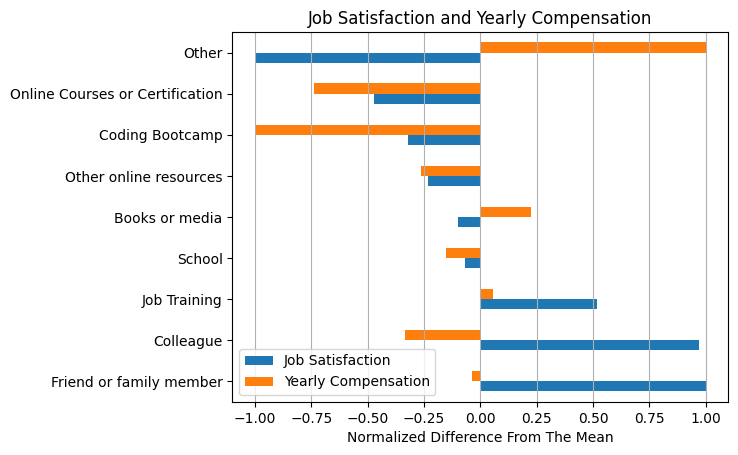

In [40]:
df_all.plot(kind='barh')
plt.title('Job Satisfaction and Yearly Compensation')
plt.xlabel('Normalized Difference From The Mean')
plt.ylabel('')
plt.grid(axis = 'x')
# plt.yticks(rotation=45, ha='right')
plt.show()

This figure provides interesting insights into how different methods of learning to code relate to job satisfaction and yearly compensation.

1. Learning from colleagues:

Highest positive correlation with both job satisfaction and yearly compensation.
Suggests that on-the-job learning and mentorship are highly valuable for career success and happiness.


2. Friend or family member:

Very high positive correlation with job satisfaction, but slightly lower for compensation.
Indicates that personal connections in learning can lead to high job satisfaction, though not necessarily the highest pay.


3. Job Training:

Positive correlation with both metrics, more so for compensation than satisfaction.
Formal on-the-job training seems to be beneficial for both career aspects.


4. School:

Slightly positive for compensation, neutral for satisfaction.
Traditional education may have a small edge in earning potential.


5. Books or media:

Positive for compensation, slightly negative for satisfaction.
Self-study through books may lead to higher pay but not necessarily higher job satisfaction.


6. Other online resources:

Slightly negative for both metrics.
While popular (as seen in the previous graph), this method doesn't seem to correlate strongly with career success or satisfaction.


7. Coding Bootcamp:

Negative correlation with both metrics, more so for satisfaction.
This is surprising and might suggest that bootcamp graduates face challenges in job satisfaction and compensation.


8. Online Courses or Certification:

Negative correlation with both metrics.
Formal online learning doesn't seem to translate directly into higher satisfaction or pay.


9. Other:

Strongly positive for compensation, strongly negative for satisfaction.
This category might include unique or specialized learning methods that lead to high-paying but potentially less satisfying roles.



Key Takeaways:

1. Collaborative and interpersonal learning methods (colleagues, friends/family, job training) seem to correlate most positively with both job satisfaction and compensation.

2. Traditional education (school) and self-study (books/media) show modest positive correlations, especially with compensation.

3. More modern, independent learning methods (online resources, bootcamps, online courses) show surprising negative correlations with both metrics.

4. The method of learning appears to have a stronger relationship with job satisfaction than with compensation in most cases.

These insights suggest that while self-directed online learning is popular, it may not directly translate to career success or satisfaction. Instead, learning methods that involve personal interaction, mentorship, and on-the-job experience seem to be more strongly associated with positive career outcomes in both satisfaction and compensation.

In [35]:
len(df['Country'].unique())

186